In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [88]:
df = pd.read_csv(r"C:\Users\SURENDER SINGH\Downloads\cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [90]:
df.isnull().sum(
    
)

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.duplicated().sum()

np.int64(172)

In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [95]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [96]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [97]:
balance_df = pd.concat([loyal_customer, disloyal_customer],axis=0)
balance_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
30952,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,69,930,2,3,2,9,11.0
35212,Male,Loyal Customer,Business travel,Business,satisfied,34,2686,5,5,4,0,0.0
33535,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied,41,620,1,2,1,0,25.0
73215,Female,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,66,151,2,4,3,0,0.0
69708,Female,Loyal Customer,Business travel,Business,satisfied,57,1771,5,5,5,1,0.0


In [98]:
cat_col = balance_df.select_dtypes("object")
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
30952,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
35212,Male,Loyal Customer,Business travel,Business,satisfied
33535,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
73215,Female,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
69708,Female,Loyal Customer,Business travel,Business,satisfied


In [99]:
num_col = balance_df.select_dtypes(exclude="object")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
30952,69,930,2,3,2,9,11.0
35212,34,2686,5,5,4,0,0.0
33535,41,620,1,2,1,0,25.0
73215,66,151,2,4,3,0,0.0
69708,57,1771,5,5,5,1,0.0


In [100]:
pd.get_dummies(cat_col , drop_first=True)

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
30952,True,False,True,False,True,False
35212,True,False,False,False,False,True
33535,False,False,False,True,False,False
73215,False,False,True,False,True,False
69708,False,False,False,False,False,True
...,...,...,...,...,...,...
103892,False,True,False,False,False,False
103895,False,True,False,True,False,False
103899,False,True,False,True,False,False
103901,True,True,False,False,False,False


In [101]:
## encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder(drop = "if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38905, 7))

In [102]:
column_name = list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [103]:
one_hot = pd.DataFrame(cat_col_encoded , columns = column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [104]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col], axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,69,930,2,3,2,9,11.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,34,2686,5,5,4,0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41,620,1,2,1,0,25.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,66,151,2,4,3,0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,57,1771,5,5,5,1,0.0


In [105]:
final_df.to_csv("cleaned_cust_satisfaction.csv",index=False)

In [106]:
x = final_df.drop("Customer Type_disloyal Customer",axis=1)
y = final_df[["Customer Type_disloyal Customer"]]

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size=0.2,random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [109]:
model.score(x_test,y_test)

0.5629474734101433

In [110]:
model.score(x_train,y_train)

0.5473658327218887

In [111]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,Customer Type_disloyal Customer,prediction
18536,0.0,0.233483
36240,1.0,1.070583
5426,0.0,0.356710
21679,1.0,0.796003
18714,0.0,-0.054933
...,...,...
23667,1.0,0.918539
9774,0.0,-0.002352
24880,1.0,0.881955
38451,1.0,0.687368


In [116]:
## model performance
## reg -- mse , mae , rmse
## class -- confusion matrix , classification report 

from sklearn.metrics import confusion_matrix , classification_report


In [121]:

# Convert continuous predictions to binary predictions
y_test["binary_prediction"] = (y_test["prediction"] >= 0.5).astype(int)

# Compute the confusion matrix
confusion_matrix(y_test["Customer Type_disloyal Customer"], y_test["binary_prediction"])

array([[3402,  600],
       [ 341, 3438]])

<Axes: >

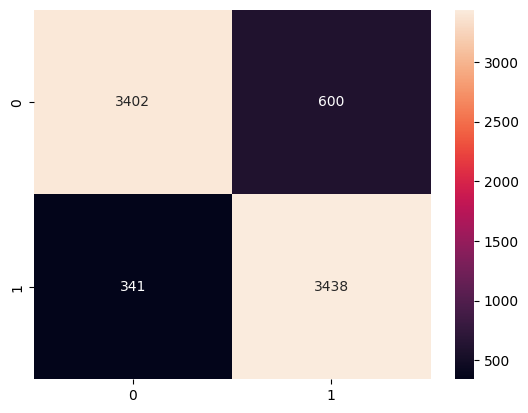

In [ ]:
sns.heatmap(confusion_matrixsns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"], y_test["binary_prediction"]), annot=True, fmt="d"))

In [127]:
##classification report
print(classification_report(y_test["Customer Type_disloyal Customer"], y_test["binary_prediction"]))


              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      4002
         1.0       0.85      0.91      0.88      3779

    accuracy                           0.88      7781
   macro avg       0.88      0.88      0.88      7781
weighted avg       0.88      0.88      0.88      7781

